# Project Name -----> Skin Cancer Detection

In [312]:
# importing requred libararies 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [280]:
# Load the labels
skin_data = pd.read_csv('skin_cancer_labels.csv') 
skin_data  =  skin_data.copy()


In [281]:
skin_data.head()

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,anatom_site_special,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,diagnosis_1,...,diagnosis_confirm_type,family_hx_mm,image_type,lesion_id,melanocytic,patient_id,personal_hx_mm,pixels_x,pixels_y,sex
0,ISIC_0000000,Anonymous,CC-0,55.0,anterior torso,NaN,NaN,False,NaN,Benign,...,NaN,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,female
1,ISIC_0000001,Anonymous,CC-0,30.0,anterior torso,NaN,NaN,False,NaN,Benign,...,NaN,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,female
2,ISIC_0000002,Anonymous,CC-0,60.0,upper extremity,NaN,NaN,True,NaN,Malignant,...,histopathology,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,female
3,ISIC_0000003,Anonymous,CC-0,30.0,upper extremity,NaN,NaN,False,NaN,Benign,...,NaN,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,male
4,ISIC_0000004,Anonymous,CC-0,80.0,posterior torso,NaN,NaN,True,NaN,Malignant,...,histopathology,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,male


In [282]:
skin_data.isnull().sum()

isic_id                      0
attribution                  0
copyright_license            0
age_approx                 256
anatom_site_general        471
anatom_site_special       1961
clin_size_long_diam_mm    1538
concomitant_biopsy           0
dermoscopic_type          1190
diagnosis_1                  0
diagnosis_2                  0
diagnosis_3                  1
diagnosis_4               1354
diagnosis_5               1752
diagnosis_confirm_type     342
family_hx_mm              1548
image_type                   0
lesion_id                 1246
melanocytic                  0
patient_id                1863
personal_hx_mm            1539
pixels_x                     0
pixels_y                     0
sex                        229
dtype: int64

In [283]:
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 2000 non-null   object 
 1   attribution             2000 non-null   object 
 2   copyright_license       2000 non-null   object 
 3   age_approx              1744 non-null   float64
 4   anatom_site_general     1529 non-null   object 
 5   anatom_site_special     39 non-null     object 
 6   clin_size_long_diam_mm  462 non-null    float64
 7   concomitant_biopsy      2000 non-null   bool   
 8   dermoscopic_type        810 non-null    object 
 9   diagnosis_1             2000 non-null   object 
 10  diagnosis_2             2000 non-null   object 
 11  diagnosis_3             1999 non-null   object 
 12  diagnosis_4             646 non-null    object 
 13  diagnosis_5             248 non-null    object 
 14  diagnosis_confirm_type  1658 non-null   

In [284]:
skin_data.columns.to_list()

['isic_id',
 'attribution',
 'copyright_license',
 'age_approx',
 'anatom_site_general',
 'anatom_site_special',
 'clin_size_long_diam_mm',
 'concomitant_biopsy',
 'dermoscopic_type',
 'diagnosis_1',
 'diagnosis_2',
 'diagnosis_3',
 'diagnosis_4',
 'diagnosis_5',
 'diagnosis_confirm_type',
 'family_hx_mm',
 'image_type',
 'lesion_id',
 'melanocytic',
 'patient_id',
 'personal_hx_mm',
 'pixels_x',
 'pixels_y',
 'sex']

In [285]:
skin_data.describe()

,age_approx,clin_size_long_diam_mm,pixels_x,pixels_y
count,1744.000000,462.000000,2000.000000,2000.000000
mean,49.033830,6.030952,2734.293000,1877.673000
std,19.731372,5.512854,1682.314035,1081.419839
min,5.000000,1.000000,576.000000,540.000000
25%,35.000000,4.000000,1024.000000,768.000000
50%,50.000000,5.000000,3008.000000,2000.000000
75%,65.000000,7.000000,4288.000000,2848.000000
max,85.000000,100.000000,6748.000000,4499.000000


In [286]:
skin_data.sex

0       female
1       female
2       female
3         male
4         male
         ...  
1995      male
1996      male
1997    female
1998      male
1999      male
Name: sex, Length: 2000, dtype: object

In [287]:
# shape of data
skin_data.shape

(2000, 24)

In [288]:
# Checking  images folder
image_folder = 'skin_cancer_data'
image_files = os.listdir(image_folder)
print(f"Number of images: {len(image_files)}")
print("First 5 image names:")
for i in range(5):
    print(image_files[i])

Number of images: 2000
First 5 image names:
ISIC_0000000.jpg
ISIC_0000001.jpg
ISIC_0000002.jpg
ISIC_0000003.jpg
ISIC_0000004.jpg


In [289]:
# Check how many benign vs malignant cases you have
print("Diagnosis distribution:")
print(skin_data['diagnosis_1'].value_counts())
print("\nPercentages:")
print(skin_data['diagnosis_1'].value_counts(normalize=True) * 100)

Diagnosis distribution:
diagnosis_1
Benign           1625
Malignant         374
Indeterminate       1
Name: count, dtype: int64

Percentages:
diagnosis_1
Benign           81.25
Malignant        18.70
Indeterminate     0.05
Name: proportion, dtype: float64


In [290]:
image_folder = 'skin_cancer_data'
image_files = os.listdir(image_folder)
print(f"Number of images: {len(image_files)}")
print("Sample image names:")
print(image_files[:5])

Number of images: 2000
Sample image names:
['ISIC_0000000.jpg', 'ISIC_0000001.jpg', 'ISIC_0000002.jpg', 'ISIC_0000003.jpg', 'ISIC_0000004.jpg']


In [291]:
skin_data.columns   

Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'anatom_site_special', 'clin_size_long_diam_mm',
       'concomitant_biopsy', 'dermoscopic_type', 'diagnosis_1', 'diagnosis_2',
       'diagnosis_3', 'diagnosis_4', 'diagnosis_5', 'diagnosis_confirm_type',
       'family_hx_mm', 'image_type', 'lesion_id', 'melanocytic', 'patient_id',
       'personal_hx_mm', 'pixels_x', 'pixels_y', 'sex'],
      dtype='object')

In [292]:
# removing unwanted columns 
skin_data.drop(['attribution','copyright_license','diagnosis_2','diagnosis_3','diagnosis_4',
                'diagnosis_5','pixels_x','pixels_y','patient_id','lesion_id','anatom_site_general',
                'anatom_site_special', 'concomitant_biopsy', 'dermoscopic_type',
                'diagnosis_confirm_type','family_hx_mm','image_type','personal_hx_mm','melanocytic'], axis=1 , inplace=True)

In [293]:
skin_data.head() # requred only :-'isic_id', 'diagnosis_1', 'clin_size_long_diam_mm', 'age_approx' ,'sex'

,isic_id,age_approx,clin_size_long_diam_mm,diagnosis_1,sex
0,ISIC_0000000,55.0,NaN,Benign,female
1,ISIC_0000001,30.0,NaN,Benign,female
2,ISIC_0000002,60.0,NaN,Malignant,female
3,ISIC_0000003,30.0,NaN,Benign,male
4,ISIC_0000004,80.0,NaN,Malignant,male


In [294]:
skin_data.isnull().sum()

isic_id                      0
age_approx                 256
clin_size_long_diam_mm    1538
diagnosis_1                  0
sex                        229
dtype: int64

In [295]:
# Removig the 1 indeterminate case another method is (drop) 

skin_data_clean = skin_data[skin_data['diagnosis_1'] != 'Indeterminate']

# balancing the dataset 
malignant = skin_data_clean[skin_data_clean['diagnosis_1']=='Malignant']
bengin = skin_data_clean[skin_data_clean['diagnosis_1']=='Benign'].sample(374 , random_state=42) # 374 cases
skin_balanced = pd.concat([malignant ,bengin])



In [296]:
skin_balanced.value_counts()

isic_id       age_approx  clin_size_long_diam_mm  diagnosis_1  sex   
ISIC_0009868  70.0        4.0                     Malignant    female    1
ISIC_0009871  45.0        5.0                     Benign       male      1
ISIC_0009873  40.0        10.0                    Benign       female    1
ISIC_0009882  60.0        5.0                     Malignant    female    1
ISIC_0009896  30.0        9.0                     Benign       male      1
                                                                        ..
ISIC_0011348  75.0        6.0                     Malignant    male      1
ISIC_0011349  65.0        12.0                    Malignant    male      1
ISIC_0011366  65.0        8.0                     Malignant    male      1
ISIC_0011387  65.0        8.0                     Malignant    female    1
ISIC_0011393  70.0        2.0                     Benign       female    1
Name: count, Length: 173, dtype: int64

In [297]:
# Checking  diameter data availability
print("Diameter data available:", skin_data['clin_size_long_diam_mm'].notna().sum())
print("Total rows:", len(skin_data))

Diameter data available: 462
Total rows: 2000


# Image preprocessing using OpneCV

In [298]:
import cv2
def preprocess_lesion(image_path):
    #loading image
    img = cv2.imread(image_path)
    
    # This line converts the image color format from BGR (Blue, Green, Red) to RGB (Red, Green, Blue).
    img_rgb = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB) 
    
    # Converting to grayscale for lesion detection
    gray = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
    
    # apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5,5),0)
    return img_rgb , blurred


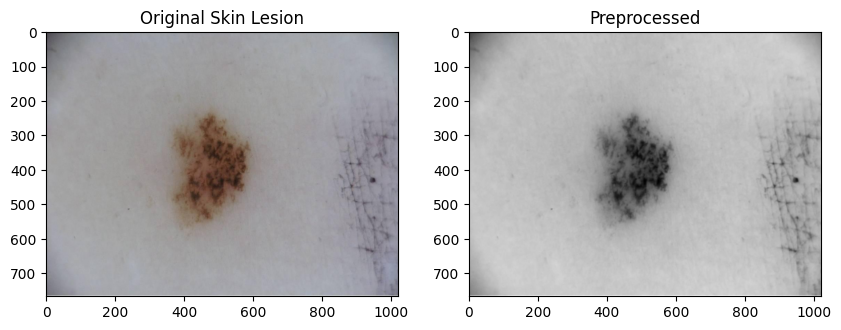

In [299]:
import matplotlib.pyplot as plt
sample_path = "skin_cancer_data/ISIC_0000010.jpg"
img_rgb, blurred = preprocess_lesion(sample_path)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Skin Lesion")

plt.subplot(1, 2, 2)  
plt.imshow(blurred, cmap='gray')
plt.title("Preprocessed")
plt.show()

# Lesion Boundry detection 

In [300]:
# detecting the lesion boundary to extract diameter + asymmetry for (one image)
# defiing methods
def extract_lesion_futures(image_path):
    # loading and preprocessing the image
    img_rgb , blurred = preprocess_lesion(image_path)
    
    # thresholud to isloate lesion(dark areas)
    _ , thresh = cv2.threshold(blurred, 0 , 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Find contours (lesion boundaries)
    contours, _ = cv2.findContours(thresh ,cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # get larget contour (main lesion)
        larget_contour = max(contours , key=cv2.contourArea)
        
        # calculate diameter (longet distance across lesion)
        rect = cv2.minAreaRect(larget_contour)
        diameter = max(rect[1]) # get longer side of bounding box
        
        # Calculate asymmetric score (simplified version)
        area = cv2.contourArea(larget_contour)
        perimeter = cv2.arcLength(larget_contour ,True)
        asymmetry = perimeter**2 / (4*np.pi * area) if area>0 else 0
        
        return diameter , asymmetry
    else:
        return 0,0
    
# testing on images
diameter , asymmetry = extract_lesion_futures("skin_cancer_data/ISIC_0000001.jpg")
print(f"Diameter : {diameter:.2f} pixels")
print(f"Asymmetry Score :{asymmetry:.2f}")

Diameter : 281.27 pixels
Asymmetry Score :2.01


# preprocessing all images

In [301]:
import pandas as pd
# tqdm is a popular Python library that helps you display a progress bar in your loops.
# It’s great for visually tracking the progress of long-running operations 
# (like reading many files, training machine learning models) 
from tqdm import tqdm  

def process_all_images(df):
    diameters = []
    asymmetries = []
    
    for isic_id in tqdm(df['isic_id']):
        image_path = f"skin_cancer_data/{isic_id}.jpg"
        try:
            diameter, asymmetry = extract_lesion_futures(image_path)
            diameters.append(diameter)
            asymmetries.append(asymmetry)
        except:
            # If image processing fails, we can use default values
            diameters.append(0)
            asymmetries.append(0)
    
    return diameters, asymmetries

# Processing  all images
print("Processing 2000 images...")
diameters, asymmetries = process_all_images(skin_data)

# Adding  new columns to dataframe
skin_data['diameter_pixels'] = diameters
skin_data['asymmetry_score'] = asymmetries

print("Feature extraction complete")
print(skin_data[['isic_id', 'diagnosis_1', 'diameter_pixels', 'asymmetry_score']].head())

Processing 2000 images...


100%|██████████| 2000/2000 [01:59<00:00, 16.81it/s]

Feature extraction complete
        isic_id diagnosis_1  diameter_pixels  asymmetry_score
0  ISIC_0000000      Benign       808.893311         2.319683
1  ISIC_0000001      Benign       281.266449         2.006928
2  ISIC_0000002   Malignant       587.055908         4.626722
3  ISIC_0000003      Benign       574.073181         2.209306
4  ISIC_0000004   Malignant      1019.000000         1.298122


In [302]:
# checking preprocessed images data
skin_data

,isic_id,age_approx,clin_size_long_diam_mm,diagnosis_1,sex,diameter_pixels,asymmetry_score
0,ISIC_0000000,55.0,NaN,Benign,female,808.893311,2.319683
1,ISIC_0000001,30.0,NaN,Benign,female,281.266449,2.006928
2,ISIC_0000002,60.0,NaN,Malignant,female,587.055908,4.626722
3,ISIC_0000003,30.0,NaN,Benign,male,574.073181,2.209306
4,ISIC_0000004,80.0,NaN,Malignant,male,1019.000000,1.298122
...,...,...,...,...,...,...,...
1995,ISIC_0015220,75.0,NaN,Benign,male,5628.303711,30.000641
1996,ISIC_0015233,60.0,NaN,Benign,male,2541.305176,5.007546
1997,ISIC_0015260,55.0,NaN,Benign,female,3544.394043,6.137405
1998,ISIC_0015284,75.0,NaN,Malignant,male,5643.000000,42.153963


In [303]:
skin_data.drop(['clin_size_long_diam_mm'] , axis=1 , inplace=True)

In [304]:
skin_data['age_approx'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: age_approx, dtype: bool

# Encoding the categorical futures

In [305]:
# Encoding Male =1 , Female = 0
le_sex = LabelEncoder()
skin_data['sex_encoded'] = le_sex.fit_transform(skin_data['sex'])

# encoding target benign = 0 , melignant = 1

le_diagonsis = LabelEncoder()

skin_data['diagnosis_encoded'] = le_diagonsis.fit_transform(skin_data['diagnosis_1'])

In [306]:
skin_data

,isic_id,age_approx,diagnosis_1,sex,diameter_pixels,asymmetry_score,sex_encoded,diagnosis_encoded
0,ISIC_0000000,55.0,Benign,female,808.893311,2.319683,0,0
1,ISIC_0000001,30.0,Benign,female,281.266449,2.006928,0,0
2,ISIC_0000002,60.0,Malignant,female,587.055908,4.626722,0,2
3,ISIC_0000003,30.0,Benign,male,574.073181,2.209306,1,0
4,ISIC_0000004,80.0,Malignant,male,1019.000000,1.298122,1,2
...,...,...,...,...,...,...,...,...
1995,ISIC_0015220,75.0,Benign,male,5628.303711,30.000641,1,0
1996,ISIC_0015233,60.0,Benign,male,2541.305176,5.007546,1,0
1997,ISIC_0015260,55.0,Benign,female,3544.394043,6.137405,0,0
1998,ISIC_0015284,75.0,Malignant,male,5643.000000,42.153963,1,2


In [307]:
skin_data.columns.isnull()

array([False, False, False, False, False, False, False, False])

In [308]:
# Droping non encoded values 
skin_data.drop(['sex','diagnosis_1'] ,axis=1 , inplace=True)

In [ ]:
skin_data

,isic_id,age_approx,diameter_pixels,asymmetry_score,sex_encoded,diagnosis_encoded
0,ISIC_0000000,55.0,808.893311,2.319683,0,0
1,ISIC_0000001,30.0,281.266449,2.006928,0,0
2,ISIC_0000002,60.0,587.055908,4.626722,0,2
3,ISIC_0000003,30.0,574.073181,2.209306,1,0
4,ISIC_0000004,80.0,1019.000000,1.298122,1,2
...,...,...,...,...,...,...
1995,ISIC_0015220,75.0,5628.303711,30.000641,1,0
1996,ISIC_0015233,60.0,2541.305176,5.007546,1,0
1997,ISIC_0015260,55.0,3544.394043,6.137405,0,0
1998,ISIC_0015284,75.0,5643.000000,42.153963,1,2


In [310]:
skin_data.drop(['isic_id'] ,axis=1 ,  inplace=True)

In [311]:
skin_data

,age_approx,diameter_pixels,asymmetry_score,sex_encoded,diagnosis_encoded
0,55.0,808.893311,2.319683,0,0
1,30.0,281.266449,2.006928,0,0
2,60.0,587.055908,4.626722,0,2
3,30.0,574.073181,2.209306,1,0
4,80.0,1019.000000,1.298122,1,2
...,...,...,...,...,...
1995,75.0,5628.303711,30.000641,1,0
1996,60.0,2541.305176,5.007546,1,0
1997,55.0,3544.394043,6.137405,0,0
1998,75.0,5643.000000,42.153963,1,2
